In [1]:
!pip install pydicom


  Obtaining dependency information for pydicom from https://files.pythonhosted.org/packages/35/2a/8c0f6fe243e6b6793868c6834203a44cc8f3f25abad780e1c7b21e15594d/pydicom-2.4.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 680.2 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pwd

/home/katerina/PycharmProjects/bsu_famcs_4_course/ds-2/lab-3


In [4]:
import pydicom
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Укажите путь к вашему DICOM файлу
dicom_file_path = '0.063-1_2.5x_View2.dcm'

ds = pydicom.read_file(dicom_file_path, force=True)
ds.BitsAllocated = 8
ds.BitsStored = 8
image_data = ds.pixel_array


image_data_normalized = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
image_data_8bit = (image_data_normalized * 255).astype('uint8')




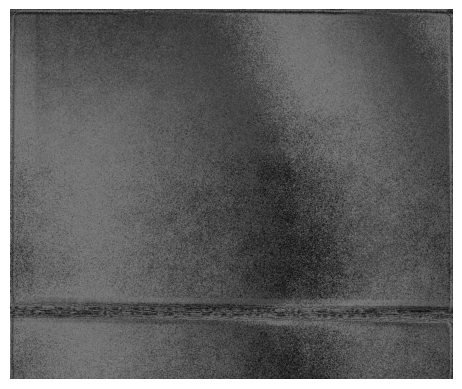

In [5]:
minval = np.percentile(image_data_8bit, 9)
maxval = np.percentile(image_data_8bit, 81)

# Применяем растяжение гистограммы
image_data_contrast = np.clip((image_data_8bit - minval) / (maxval - minval), 0, 1) * 255
image_data_contrast = image_data_contrast.astype('uint8')

# Создаем изображение PIL и сохраняем в формате JPG
image = Image.fromarray(image_data_contrast)
image.save('image_with_contrast.jpg')

# Отобразим изображение для визуальной проверки
plt.imshow(image_data_contrast, cmap='gray')
plt.axis('off')
plt.show()